# Machine Learning & Statistics Project 2019

## Richella O'Driscoll

### Problem Statement:

This assessment concerns the well known Boston House Prices dataset and the Python packages scipy, keras and jupyter and is broken down into the below 3 parts:

* Create a jupyter notebook that uses descriptive statistics and plots to describe the Boston House Proces dataset.
* In this jupyter notebook, add a section where inferential statistics are used to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and houses that are not.
* Use keras to create a neutral network that can predict the median house price based on the other variable in the dataset.


## What is the Boston House prices dataset?

The Boston House Prices dataset contains information collected by the U.S Census Service concerning housing in the area of Boston. 

It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms.

However, these comparisons were primarily done outside of Delve and are thus somewhat suspect. The dataset is small in size with only 506 cases.

The data was originally published by Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978. 

## My Analysis

In order for me to compete this assignment, there were a number of resources I needed. These included:

* Jupyter Notebook
* Github
* Python version 3.6 downloaded through Anaconda3 After some research I realised that I would also need to ensure that there was a number of other libraries installed on Python so that I would be able to complete this assignment. These included:
<br>
1. matplotlib 
2. numpy 
3. seaborn 
4. pandas 
5. sklearn
6. scipy 
7. keras
8. statsmodels

## Imports Required:

In [1]:
#import libraries
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import stats
from scipy.stats import mstats, kruskal
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import keras as kr
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
import tensorflow as tf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import sklearn.preprocessing as pre
import sklearn.model_selection as mod
from sklearn.linear_model import LogisticRegression
from sklearn.datasets.samples_generator import make_blobs

C:\Users\riche\Anaconda3.1\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\riche\Anaconda3.1\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Load this data set from sklearn.datasets
df = load_boston()

In [5]:
# Describe this dataset
df.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [13]:
# width and length of data set
df.data.shape

(506, 13)

In [21]:
# Convert the dataset to a pandas dataframe to perform exploratory analysis

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = pd.Series(boston.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
#is there any missing data
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

The features of the Boston House Prices data set are outlined below:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000's dollars

## My Initial Observations of the Boston House Prices Data Set:

Data Science is the process of making assumptions and hypothesis on sets of data, and testing these assumptions by performing tasks and writing specific lines of code. For the purposes of this project, I am going to make the could make the following assumptions for the dataset:



* Neighborhoods that have a higher proportions of lower class workers (higher ‘LSTAT’ value) will have properties that are of a lesser value that neighbourhoods that have a higher proportion of higher class workers. If the percentage of lower working class people is higher, it is likely that their purchasing power will be lower and therefore, they will have cheaper houses. They are inversely proportional variables.


* Houses that have more rooms (higher ‘RM’ value) will alwayas be worth a higher value. Usually houses with more rooms can fit more people and are larger in size, as a result of this they will cost more. Size and cost are directly proportional variables.



* Neighborhoods that have a higher student to teacher ratio (higher ‘PTRATIO’ value) will worth less. If the percentage of students to teachers ratio people is higher, it is likely that in the neighborhood there are not many schools, may be due to the fact that less tax income is generated in the area which could be because in that neighborhood people earn less money. As we stated above, if people earn a lesser income it is likely that their houses are worth less. These are inversely proportional variables.

# Descriptive Statistics

In [27]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


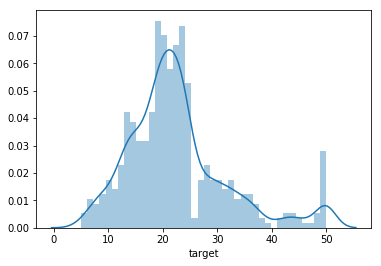

In [23]:
#Checking the distribution of the target (price) variable
sns.distplot(df_bsn['target'], bins=40)
plt.show()

In [32]:
#Summary and description of the dataset to get a detailed statistical information for each column
df.describe().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.594,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.597,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.378,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.647,12.500,18.100,0.000,0.624,6.624,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.126,24.000,711.000,22.000,396.900,37.970,50.000


What the above shows us is the percentile’s and other key statistics. The min value of a house in 1978 was 5,000 dollars with max value of 50,000 dollars. The average house price in 1978 was 22,533 dollars. We can see that the max number of rooms per house is 8.78, the min number is 3.56 and mean of 6.3. Let's use this describe function to see some visualisation. The min Pupil Teacher Ratio was 12.6:1, the max Pupil Teacher Ratio was 22:1 and the mean was 18.4:1. Below I will dispaly somoe of these stats in graph format:

C:\Users\riche\Anaconda3.1\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


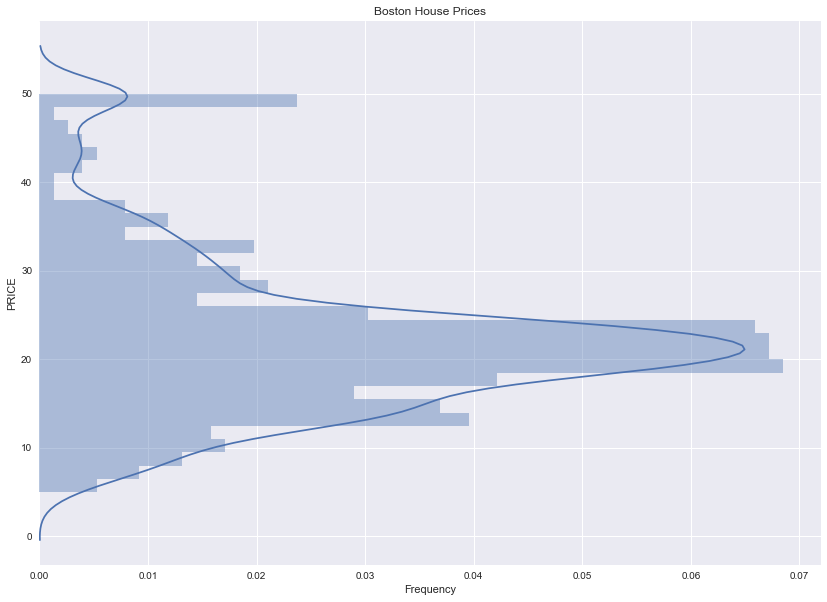

In [50]:
# Use seaborn to create a plot
# Use color codes to change color
sns.set_color_codes()

# Re-size the displot
sns.set(rc={'figure.figsize':(14,10)})

# Create a displot to show the 'Price'
sns.distplot(df['PRICE'], bins=30, vertical=True, color="b")

#Title
plt.title("Boston House Prices")       

# X -axis description
plt.xlabel("Frequency")

#Print plot
plt.show()

In [56]:
#skewness and kurtosis
print("Skewness: %f" % df['PRICE'].skew())
print("Kurtosis: %f" % df['PRICE'].kurt())

Skewness: 1.108098
Kurtosis: 1.495197


The big difference between skewness and kurtosis is that skewness talks of the degree of symmetry in the frequency distribution. Kurtosis in turn talks of the degree of peakedness in the frequency distribution. As the prices listed in the dataset are above 1, the data is positively highly skewed. The kurtosis in the above graph is 1.495. This distribution has kurtosis statistic similar to that of the normal distribution. What this means is that the extreme values of the distribution are similar to that of a normal distribution characteristic.

As we can see from the plot above, the majority of the prices between 19,000 dollars and 24,000 dollars with a few outliners in the min and max values.

Below I have ran the distribtion skew and kurtosis for the rest of the data set.

In [59]:
#Distribution Skew
print(df.skew())

CRIM       5.237578
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
PRICE      1.108098
dtype: float64


In [60]:
# Is data heavy tailed or light tailed
print(df.kurt())

CRIM       37.267180
ZN          4.031510
INDUS      -1.233540
CHAS        9.638264
NOX        -0.064667
RM          1.891500
AGE        -0.967716
DIS         0.487941
RAD        -0.867232
TAX        -1.142408
PTRATIO    -0.285091
B           7.226818
LSTAT       0.493240
PRICE       1.495197
dtype: float64


C:\Users\riche\Anaconda3.1\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


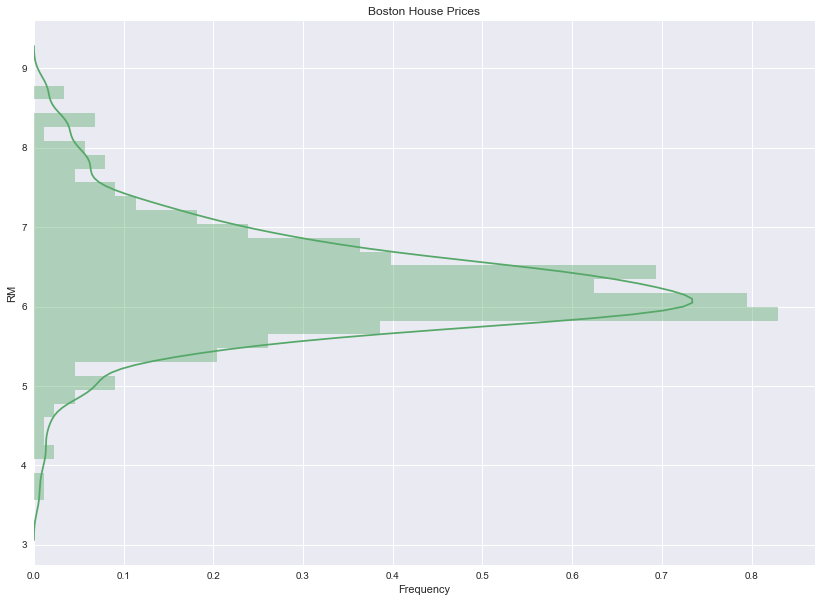

In [51]:
# Use seaborn to create a plot
# Use color codes to change color
sns.set_color_codes()

# Re-size the displot
sns.set(rc={'figure.figsize':(14,10)})

# Create a displot to show the 'Rooms per Dwelling'
sns.distplot(df['RM'], bins=30, vertical=True, color="g")

#Title
plt.title("Boston House Prices")       

# X -axis description
plt.xlabel("Frequency")

#Print plot
plt.show()

C:\Users\riche\Anaconda3.1\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


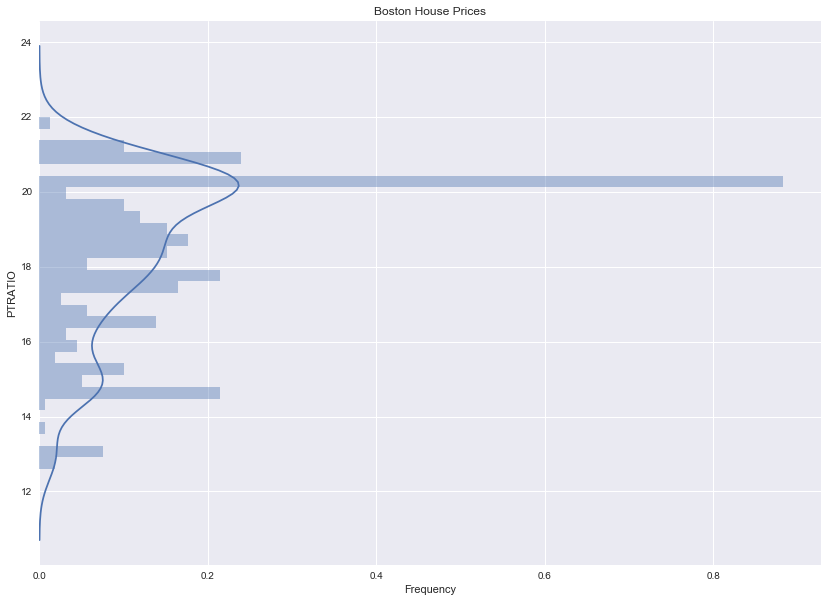

In [54]:
# Use seaborn to create a plot
# Use color codes to change color
sns.set_color_codes()

# Re-size the displot
sns.set(rc={'figure.figsize':(14,10)})

# Create a displot to show the 'Pupil Teacher Ratio'
sns.distplot(df['PTRATIO'], bins=30, vertical=True, color="b")

#Title
plt.title("Boston House Prices")       

# X -axis description
plt.xlabel("Frequency")

#Print plot
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AE9CE1E518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001AE9DF3E438>]], dtype=object)

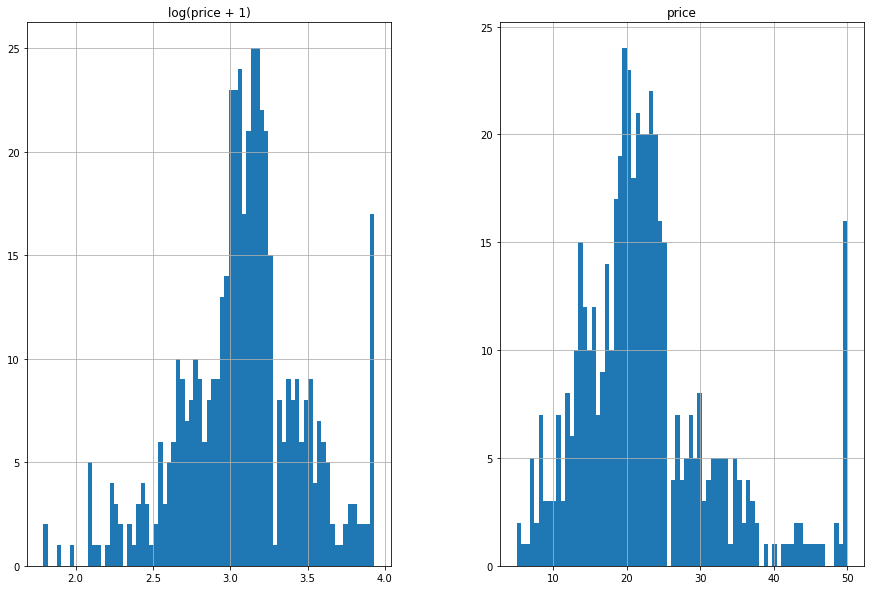

In [28]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
prices = pd.DataFrame({"price":df_bsn["target"], "log(price + 1)":np.log1p(df_bsn["target"])})
prices.hist(bins = 75)

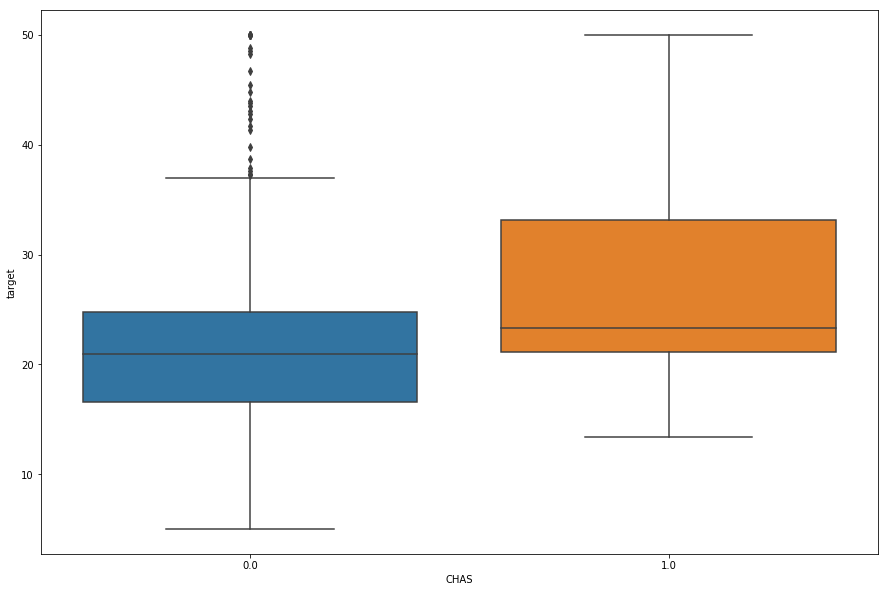

In [29]:
# Outliers check
sns.boxplot(x="CHAS", y="target", data=df_bsn)
plt.show()

C:\Users\riche\Anaconda3.1\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


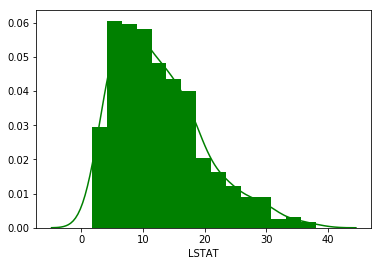

In [31]:
sns.distplot(df['LSTAT'], kde = True, color = 'g', hist_kws={'alpha': 1.0})

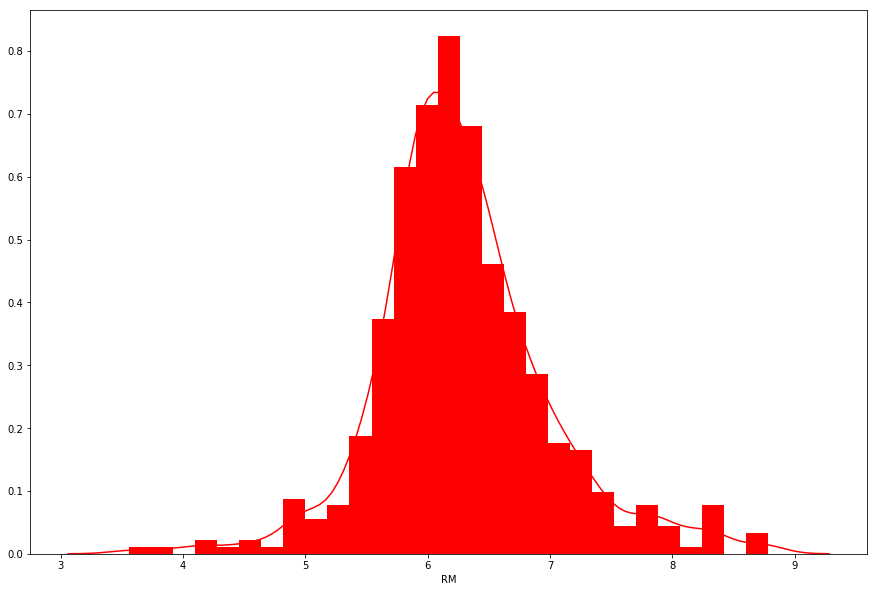

In [35]:
sns.distplot(df_bsn['RM'], kde = True, color = 'r', hist_kws={'alpha': 1.0})

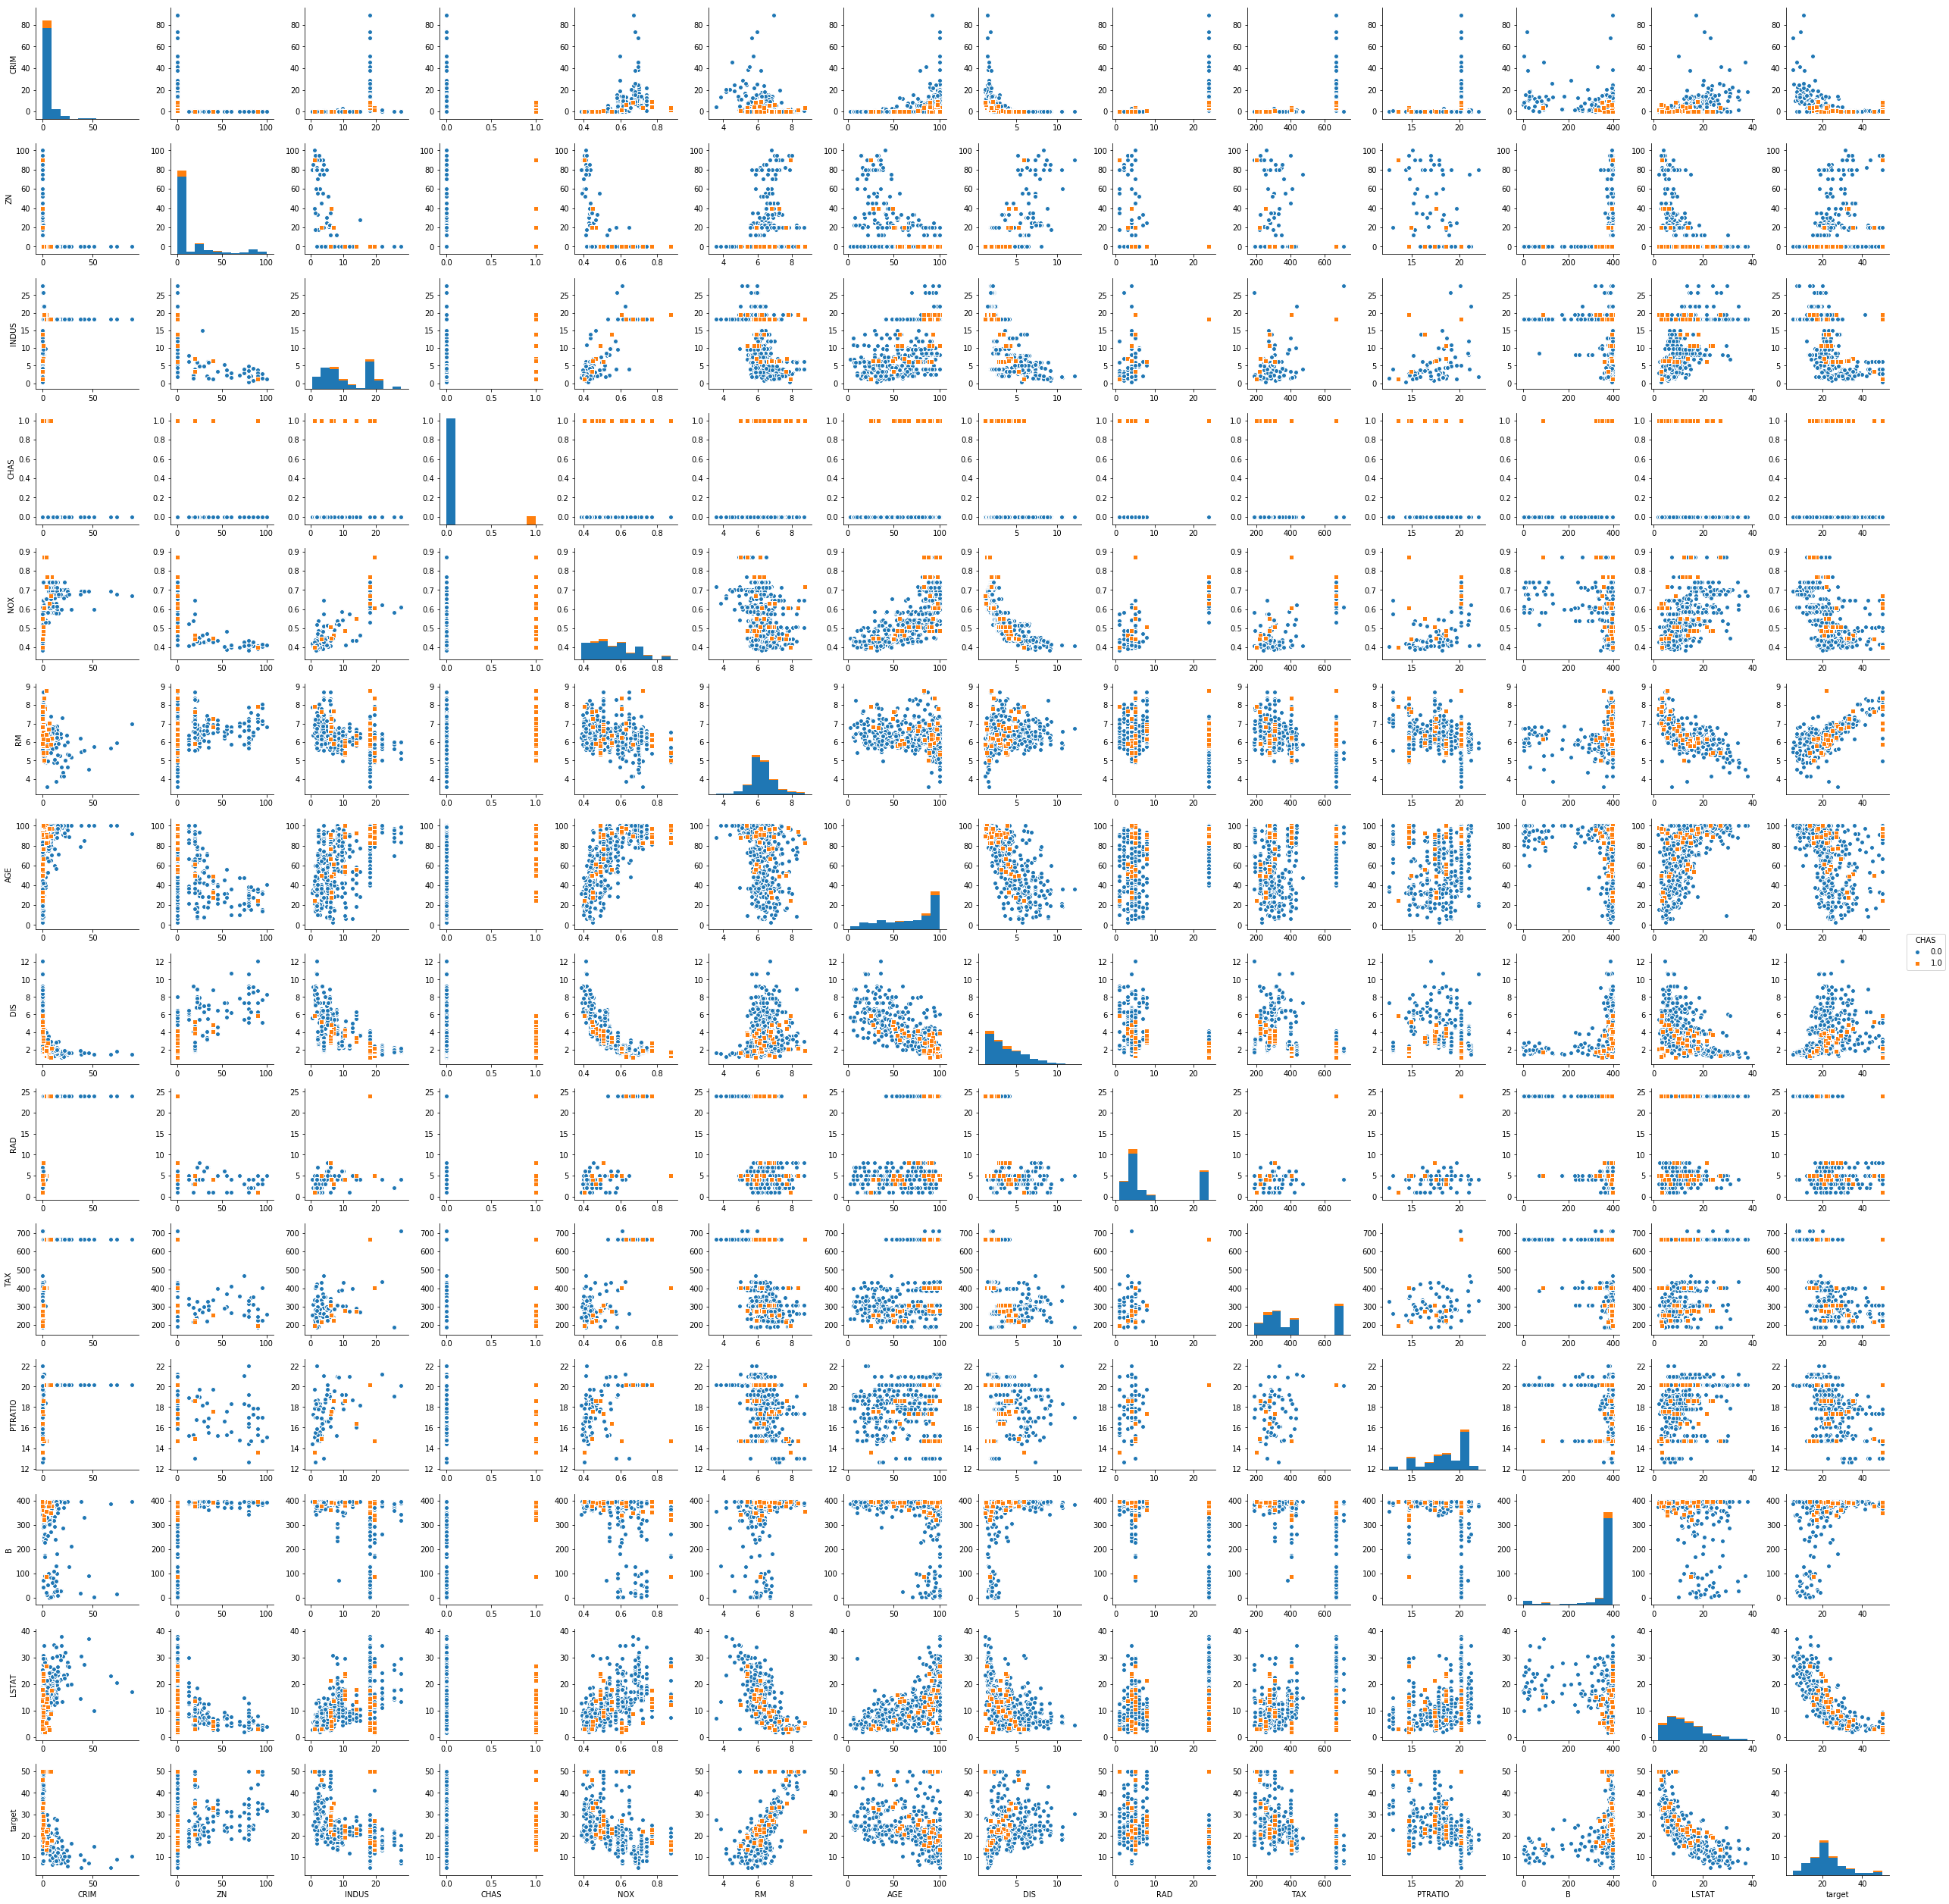

In [36]:
# Display the relationship between variables
sns.pairplot(df_bsn, hue="CHAS", markers=["o", "s"])

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()

In [6]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

C:\Users\riche\Anaconda3.1\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


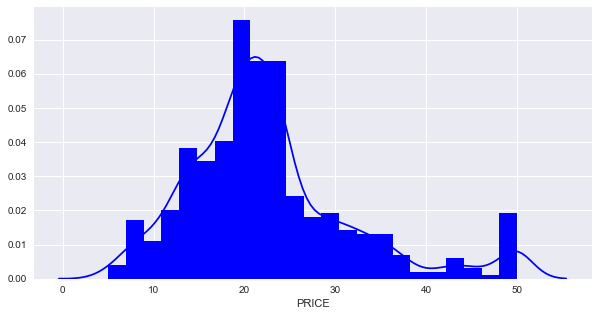

In [36]:
sns.distplot(df['PRICE'], kde = True, color = 'b', hist_kws={'alpha': 1.0})

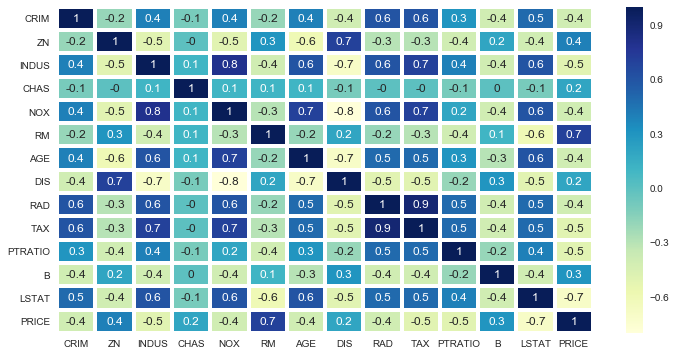

In [117]:
# Create a matrix to show the interaction between variables of the data set. Round the data to 1 decimal place.
correlation_matrix = df.corr().round(1)

# Use annotation to input data set into a square matrix with color "YlGnBu"
sns.heatmap(data=correlation_matrix, linewidths=3, annot=True, cmap="YlGnBu")

# Re-size my matrix
sns.set(rc={'figure.figsize':(13,6.5)})

# Inferential Statistics

C:\Users\riche\Anaconda3.1\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'House Price')

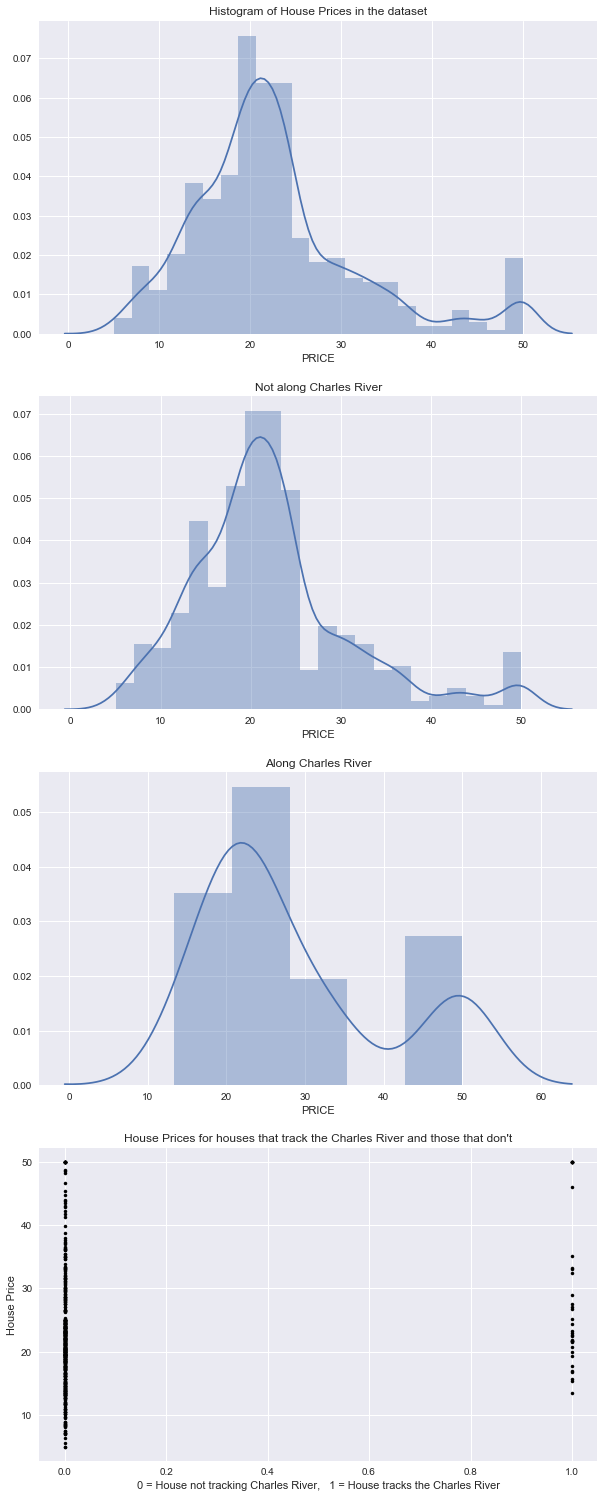

In [40]:
# Set x value to independent variable that determines whether the house tracks the Charles River.
x = df['CHAS']
# Set y value to the house price.
y = df['PRICE']
z0 = df[df['CHAS'] == 0]['PRICE']
z1 = df[df['CHAS'] == 1]['PRICE']

plt.subplots(3,1,figsize=(10,10))
plt.subplots_adjust(bottom=2, top=4)

# Subplot 1: Plot of the distribution of House Prices not along Charles River
plt.subplot(411)
plt.title("Histogram of House Prices in the dataset")
#sns.distplot(y)
sns.distplot(y)

# Subplot 1: Plot of the distribution of House Prices not along Charles River
plt.subplot(412)
plt.title("Not along Charles River")
#sns.distplot(y)
sns.distplot(z0)

# Subplot 2: Plot of the distribution of House Prices along Charles River
plt.subplot(413)
plt.title("Along Charles River")
sns.distplot(z1)

# Subplot 3: Categorical variable "CHAR" vs House Price "PRICE"
plt.subplot(414)
plt.plot(x, y, 'k.')
plt.title("House Prices for houses that track the Charles River and those that don't")
plt.xlabel("0 = House not tracking Charles River,   1 = House tracks the Charles River")
plt.ylabel("House Price")

## T - Test

In [69]:
# Two variables
X = df.drop('PRICE', axis = 1)
Y = df['PRICE']

# Split dataset into train and test. Test portion 33% test size
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print("X Train :",X_train.shape)
print("X Test  :",X_test.shape)
print("Y Train :",Y_train.shape)
print("X Test  :",Y_test.shape)

X Train : (339, 13)
X Test  : (167, 13)
Y Train : (339,)
X Test  : (167,)


Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

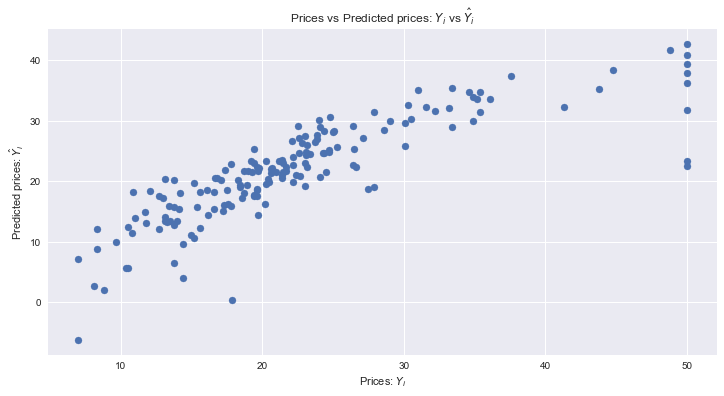

In [70]:

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [84]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([Dense(2, input_dim=1), Dense(1)])

In [85]:
from keras import losses

model.compile(loss=losses.mean_squared_error, optimizer='sgd')

In [93]:
# Start a neural network, building it up by layers.
model = kr.models.Sequential()

# Add a hidden layer with 64 neurons and an input layer with 4.
model.add(kr.layers.Dense(units=64, activation='relu', input_dim=4))
# Add a three neuron output layer.
model.add(kr.layers.Dense(units=3, activation='softmax'))

# Build a graph.
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [96]:
#Separate the inputs from the rest of the variables.
inputs = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']]

In [97]:
inputs

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [113]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error


lin_model = LinearRegression()

lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [107]:
mse = mean_squared_error(Y_test, Y_pred)
print(mse)

28.54136727561863


In [3]:
# https://www.kaggle.com/hugosjoberg/house-prices-prediction-using-keras
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer ='adam', loss = 'mean_squared_error', 
              metrics =[metrics.mae])
    return model

In [110]:
model = create_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_12 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_13 (Dense)             (None, 40)                1240      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 41        
Total params: 1,751
Trainable params: 1,751
Non-trainable params: 0
_________________________________________________________________


In [111]:
history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=339, batch_size=32)

Train on 339 samples, validate on 167 samples
Epoch 1/339
339/339 [==============================] - 0s 1ms/step - loss: 141.6376 - mean_absolute_error: 9.2133 - val_loss: 99.3520 - val_mean_absolute_error: 7.1580
Epoch 2/339
339/339 [==============================] - 0s 73us/step - loss: 80.0548 - mean_absolute_error: 6.6415 - val_loss: 86.3111 - val_mean_absolute_error: 6.3883
Epoch 3/339
339/339 [==============================] - 0s 65us/step - loss: 63.8401 - mean_absolute_error: 5.6997 - val_loss: 77.7489 - val_mean_absolute_error: 6.0149
Epoch 4/339
339/339 [==============================] - 0s 56us/step - loss: 60.0964 - mean_absolute_error: 5.3703 - val_loss: 73.3841 - val_mean_absolute_error: 6.0021
Epoch 5/339
339/339 [==============================] - 0s 79us/step - loss: 64.6301 - mean_absolute_error: 5.7930 - val_loss: 73.1186 - val_mean_absolute_error: 5.9957
Epoch 6/339
339/339 [==============================] - 0s 71us/step - loss: 60.4935 - mean_absolute_error: 5.5995 

339/339 [==============================] - 0s 153us/step - loss: 30.3553 - mean_absolute_error: 3.9270 - val_loss: 38.0365 - val_mean_absolute_error: 4.3933
Epoch 98/339
339/339 [==============================] - 0s 132us/step - loss: 29.8433 - mean_absolute_error: 3.8566 - val_loss: 38.9032 - val_mean_absolute_error: 4.1891
Epoch 99/339
339/339 [==============================] - 0s 109us/step - loss: 30.2045 - mean_absolute_error: 3.8631 - val_loss: 38.4387 - val_mean_absolute_error: 4.7591
Epoch 100/339
339/339 [==============================] - 0s 97us/step - loss: 27.3261 - mean_absolute_error: 3.8038 - val_loss: 36.9660 - val_mean_absolute_error: 4.1593
Epoch 101/339
339/339 [==============================] - 0s 106us/step - loss: 29.6253 - mean_absolute_error: 3.9216 - val_loss: 39.7708 - val_mean_absolute_error: 4.9403
Epoch 102/339
339/339 [==============================] - 0s 106us/step - loss: 35.1249 - mean_absolute_error: 4.3621 - val_loss: 40.4281 - val_mean_absolute_error

Epoch 145/339
339/339 [==============================] - 0s 106us/step - loss: 23.5534 - mean_absolute_error: 3.4006 - val_loss: 29.0410 - val_mean_absolute_error: 3.7889
Epoch 146/339
339/339 [==============================] - 0s 91us/step - loss: 24.6988 - mean_absolute_error: 3.5943 - val_loss: 31.2422 - val_mean_absolute_error: 4.3088
Epoch 147/339
339/339 [==============================] - 0s 112us/step - loss: 24.6683 - mean_absolute_error: 3.6036 - val_loss: 31.1532 - val_mean_absolute_error: 4.2552
Epoch 148/339
339/339 [==============================] - 0s 135us/step - loss: 24.2459 - mean_absolute_error: 3.5756 - val_loss: 31.1645 - val_mean_absolute_error: 3.9291
Epoch 149/339
339/339 [==============================] - 0s 115us/step - loss: 24.9879 - mean_absolute_error: 3.5298 - val_loss: 28.6125 - val_mean_absolute_error: 3.8639
Epoch 150/339
339/339 [==============================] - 0s 126us/step - loss: 24.3516 - mean_absolute_error: 3.6524 - val_loss: 31.3238 - val_mea

339/339 [==============================] - 0s 88us/step - loss: 24.3008 - mean_absolute_error: 3.6520 - val_loss: 24.3956 - val_mean_absolute_error: 3.7847
Epoch 242/339
339/339 [==============================] - 0s 91us/step - loss: 23.6413 - mean_absolute_error: 3.6451 - val_loss: 27.2090 - val_mean_absolute_error: 4.1299
Epoch 243/339
339/339 [==============================] - 0s 132us/step - loss: 21.7000 - mean_absolute_error: 3.3663 - val_loss: 23.1202 - val_mean_absolute_error: 3.5577
Epoch 244/339
339/339 [==============================] - 0s 76us/step - loss: 20.8242 - mean_absolute_error: 3.3706 - val_loss: 26.1472 - val_mean_absolute_error: 3.6622
Epoch 245/339
339/339 [==============================] - 0s 82us/step - loss: 19.9932 - mean_absolute_error: 3.1760 - val_loss: 24.4713 - val_mean_absolute_error: 3.5303
Epoch 246/339
339/339 [==============================] - 0s 94us/step - loss: 19.8379 - mean_absolute_error: 3.1012 - val_loss: 22.7549 - val_mean_absolute_error: 

339/339 [==============================] - 0s 53us/step - loss: 20.9529 - mean_absolute_error: 3.3060 - val_loss: 21.0761 - val_mean_absolute_error: 3.6256
Epoch 338/339
339/339 [==============================] - 0s 79us/step - loss: 18.8187 - mean_absolute_error: 3.0102 - val_loss: 20.5024 - val_mean_absolute_error: 3.3454
Epoch 339/339
339/339 [==============================] - 0s 79us/step - loss: 17.4976 - mean_absolute_error: 2.9474 - val_loss: 20.1040 - val_mean_absolute_error: 3.4617


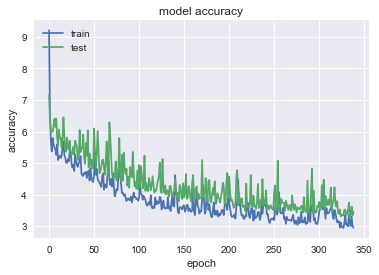

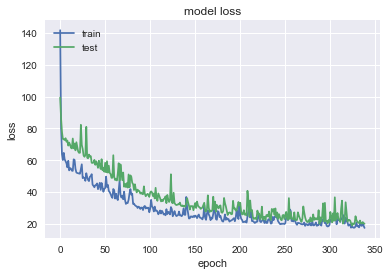

In [114]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [6]:
model = LogisticRegression()

In [5]:
df = load_boston()